In [125]:
import pandas as pd


In [126]:
df=pd.read_csv('predict_insurance_charges.csv')

In [127]:
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [128]:
print(df.info())
print(df.describe())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB
None
             index          age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000
mean    668.500000    39.207025    30.663397     1.094918  13270.422265
std     386.391641    14.049960     6.098187     1.205493  12110.011237
min       0.000000    18.000000    15.960000     0.000000   1121.873900
25%     334.250000    27.000000    26.296250     0.000000   4740.287150
50% 

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [129]:
# Checking the duplicate values
df.duplicated().sum()

0

In [130]:
df.nunique()

index       1338
age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_21880\1195342411.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='Set2')


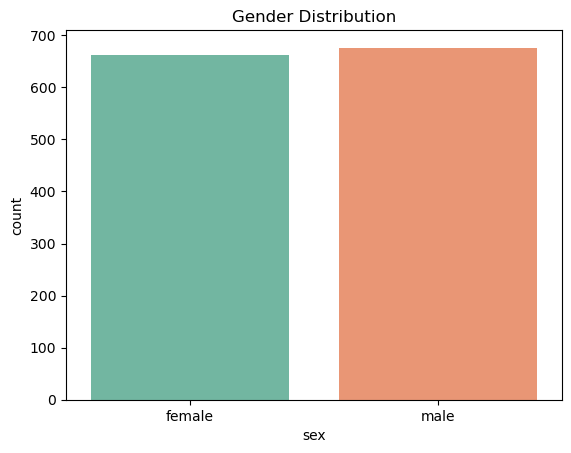

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='sex', data=df, palette='Set2')
plt.title("Gender Distribution")
plt.show()

In [132]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.pairplot(df)
# sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
# plt.show()


In [133]:
df.columns

Index(['index', 'age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

In [134]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [135]:
print(df.dtypes)

index         int64
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [136]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
le = LabelEncoder()

# Convert binary categorical columns
df['sex'] = le.fit_transform(df['sex'])       # male=1, female=0
df['smoker'] = le.fit_transform(df['smoker']) # yes=1, no=0

# For multi-class column
df['region'] = le.fit_transform(df['region']) # each region gets a numeric label

In [137]:
df.tail()

,index,age,sex,bmi,children,smoker,region,charges
1333,1333,50,1,30.97,3,0,1,10600.5483
1334,1334,18,0,31.92,0,0,0,2205.9808
1335,1335,18,0,36.85,0,0,2,1629.8335
1336,1336,21,0,25.80,0,0,3,2007.9450
1337,1337,61,0,29.07,0,1,1,29141.3603


In [138]:
corr_matrix = df.corr()

In [139]:
corr_matrix

,index,age,sex,bmi,children,smoker,region,charges
index,1.000000,-0.031467,0.003704,-0.036169,0.025221,0.005217,-0.001333,-0.003373
age,-0.031467,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,0.003704,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,-0.036169,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.025221,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,0.005217,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,-0.001333,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,-0.003373,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


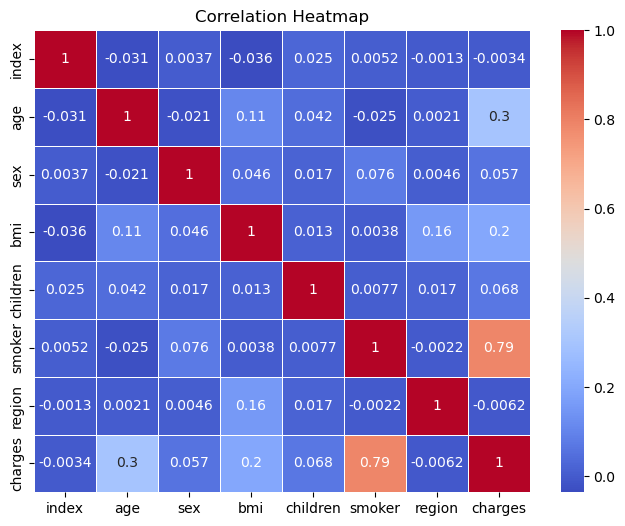

In [140]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


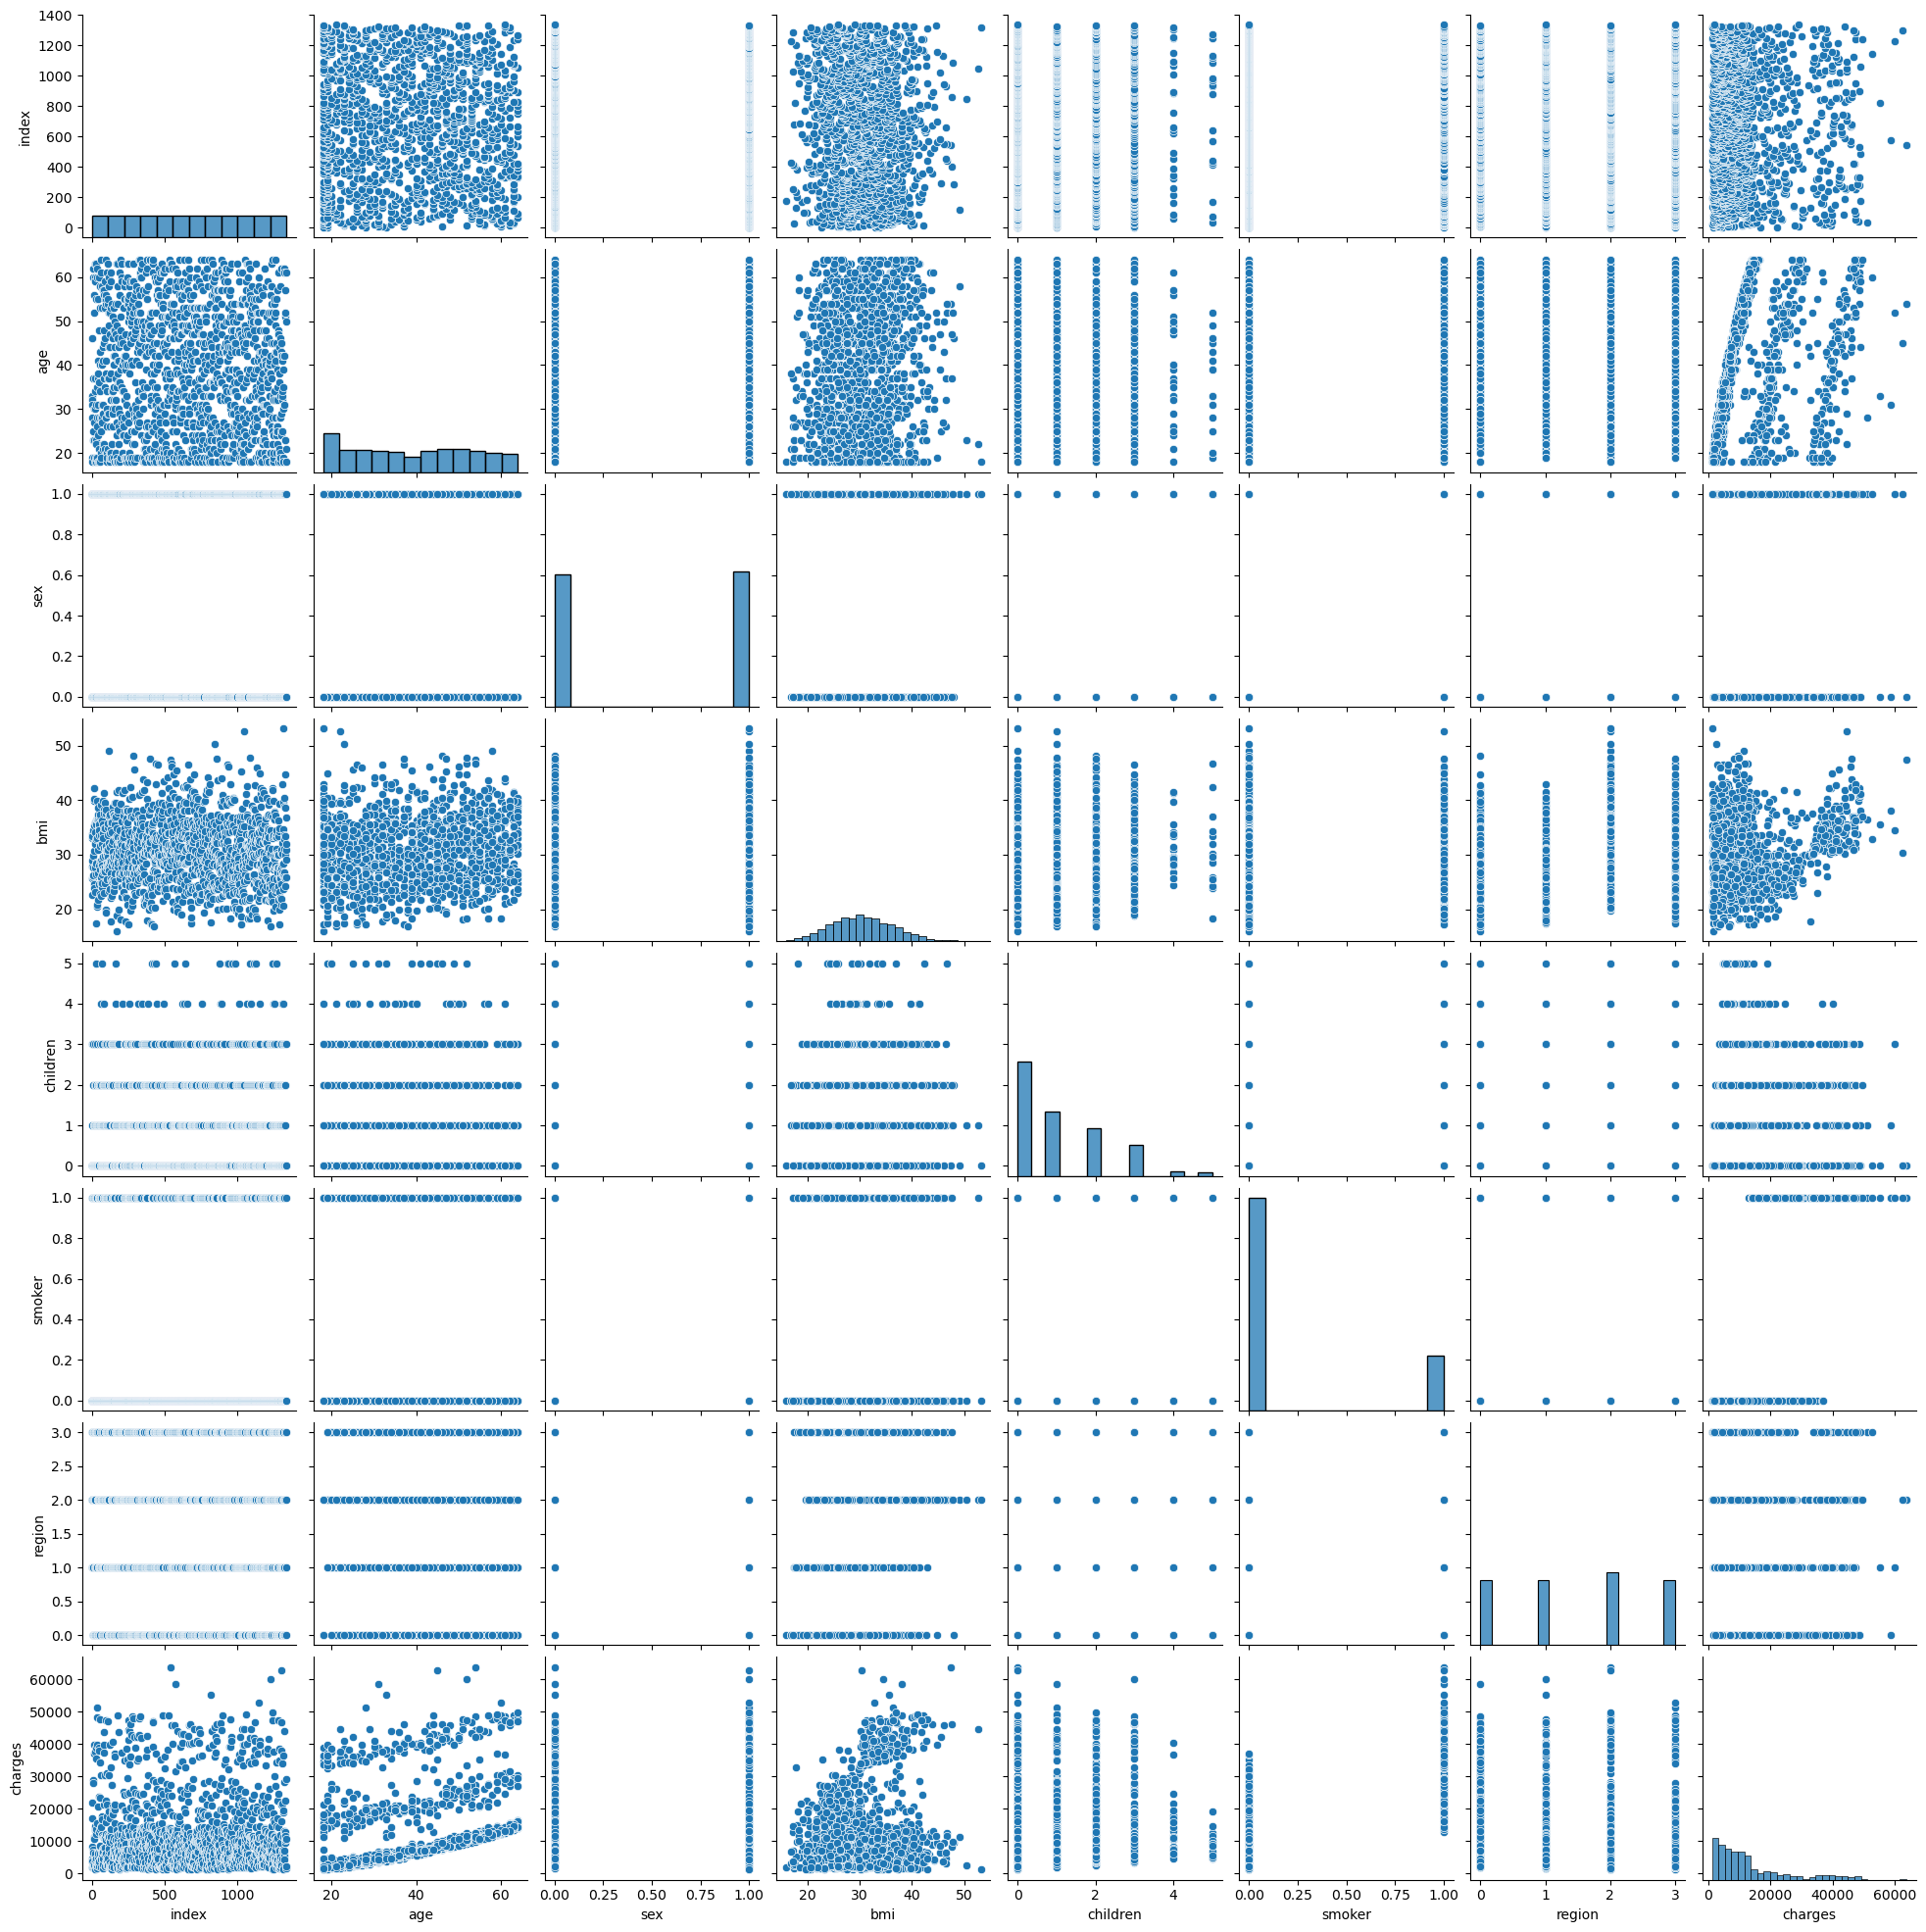

In [141]:
sns.pairplot(df)
plt.show()

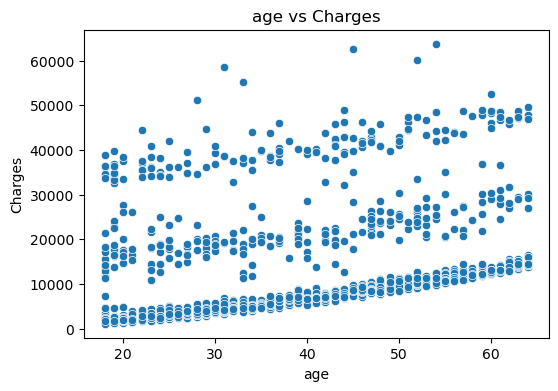

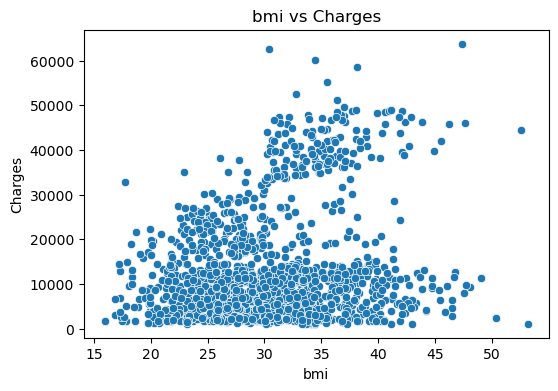

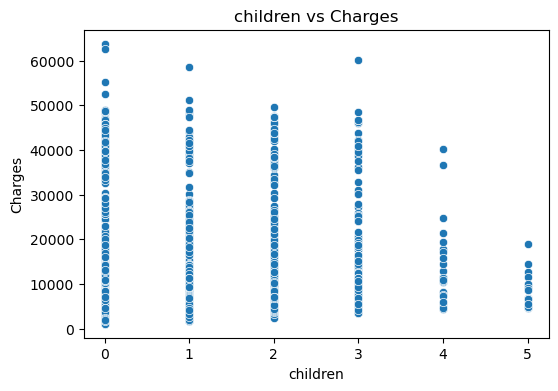

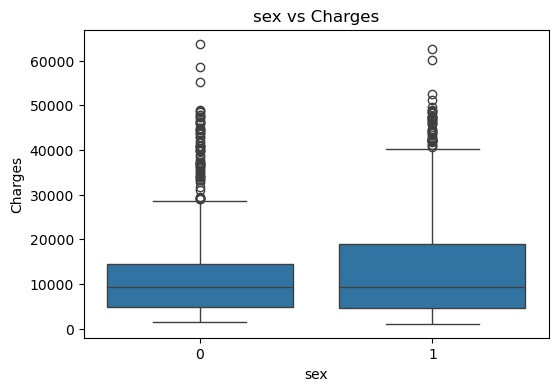

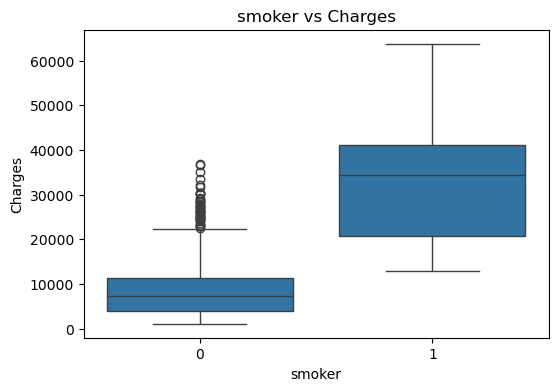

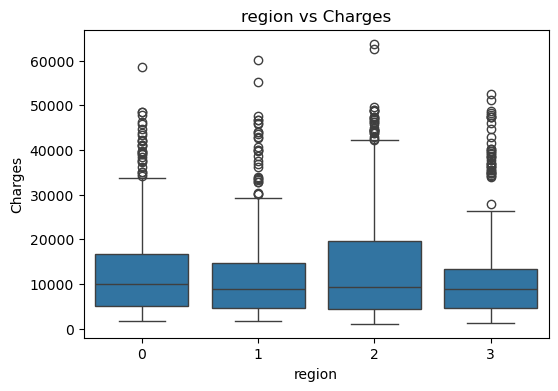

In [142]:
numeric_features = ['age', 'bmi', 'children']

for feature in numeric_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feature], y=df['charges'])
    plt.title(f'{feature} vs Charges')
    plt.xlabel(feature)
    plt.ylabel('Charges')
    plt.show()

# ----------------
# 2. Categorical features vs charges → boxplots
# ----------------
categorical_features = ['sex', 'smoker', 'region']

for feature in categorical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[feature], y=df['charges'])
    plt.title(f'{feature} vs Charges')
    plt.xlabel(feature)
    plt.ylabel('Charges')
    plt.show()


In [143]:

# Drop both 'charges' and 'index' columns from df
X = df.drop(columns=['charges', 'index'])
y = df['charges']



In [144]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [145]:
import pandas as pd
import numpy as np

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [147]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [148]:
X_train.shape

(1070, 6)

In [149]:
y_train.shape

(1070,)

In [150]:
# Drop the index column if it exists
if 'index' in X_train.columns:
    X_train = X_train.drop(columns=['index'])
if 'index' in X_test.columns:
    X_test = X_test.drop(columns=['index'])


In [151]:
X_train.shape

(1070, 6)

In [152]:
X_test.shape

(268, 6)

In [153]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(50,50), max_iter=1000, random_state=42)
}

for name, model in models.items():
    # Use scaled data for NN, original for tree-based models
    X_train_input = X_train_scaled if name == "Neural Network" else X_train
    X_test_input = X_test_scaled if name == "Neural Network" else X_test
    
    model.fit(X_train_input, y_train)
    y_pred = model.predict(X_test_input)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)*100
    
    print(f"{name} --> MSE: {mse:.2f}, R2: {r2:.2f}")


Linear Regression --> MSE: 33635210.43, R2: 78.33
Decision Tree --> MSE: 49003243.61, R2: 68.44
Random Forest --> MSE: 21073365.42, R2: 86.43
Gradient Boosting --> MSE: 18944595.16, R2: 87.80
Neural Network --> MSE: 27441951.87, R2: 82.32


c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [154]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid.fit(X_train, y_train)

print("Best Params (Random Forest):", grid.best_params_)
best_rf = grid.best_estimator_

# Evaluate best RF
y_pred_rf = best_rf.predict(X_test)
print("Tuned Random Forest --> MSE:", mean_squared_error(y_test, y_pred_rf), 
      "R2:", r2_score(y_test, y_pred_rf)*100)


Best Params (Random Forest): {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Tuned Random Forest --> MSE: 19287614.60266859 R2: 87.57631420409344


In [155]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid = GridSearchCV(GradientBoostingRegressor(random_state=42), 
                    param_grid, cv=3, scoring='r2', n_jobs=-1)

# Fit on training data
grid.fit(X_train_scaled, y_train)

# Best model
best_gb = grid.best_estimator_
print("Best Params (Gradient Boosting):", grid.best_params_)



Best Params (Gradient Boosting): {'learning_rate': 0.05, 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [156]:
y_pred = best_gb.predict(X_test_scaled)

print("Tuned Gradient Boosting --> MSE:", mean_squared_error(y_test, y_pred))
print("Tuned Gradient Boosting --> R2:", r2_score(y_test, y_pred)*100)


Tuned Gradient Boosting --> MSE: 18813035.601298526
Tuned Gradient Boosting --> R2: 87.88200365920838


In [157]:
# Save model
import pickle
with open('best_gradient_boosting_model.pkl', 'wb') as file:
    pickle.dump(best_gb, file)

# Save scaler (important for future predictions)
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Gradient Boosting model and scaler saved successfully!")


Gradient Boosting model and scaler saved successfully!
